# Linear regression background

## Importing necessary libraries

In [8]:
from matplotlib import pyplot as plt
import numpy as np
import random
%matplotlib inline

## Test dataset generation

In [9]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


## Visualizing test data

Text(0, 0.5, 'prices')

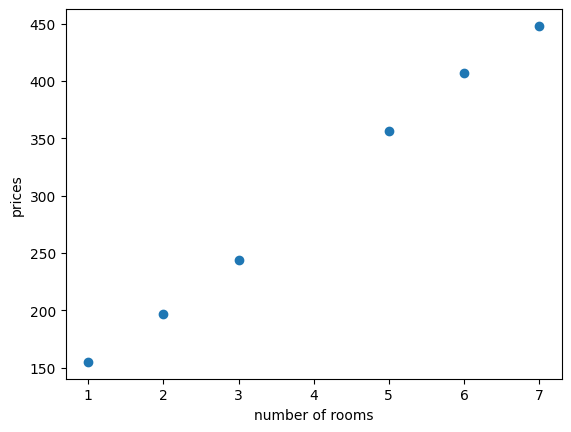

In [10]:
X = np.array(features)
y = np.array(labels)
plt.scatter(X, y)
plt.xlabel('number of rooms')
plt.ylabel('prices')

## Algorithm Description
All three functions represent different algorithms for training a simple linear model. Their common goal is to iteratively adjust the model's parameters (base_price and price_per_room) to improve its prediction accuracy. The key difference between them lies in how they calculate the adjustment at each step.

1. simple_trick (Random Adjustment)
This method adjusts the model's parameters using small, random values.

Description: The algorithm checks if the prediction was too high or too low. It then nudges the parameters in the correct direction by a small, randomly generated amount.

Characteristic: This is the most primitive and non-systematic approach. It illustrates the idea of learning but is not effective in practice due to its random nature.

2. absolute_trick (Fixed Adjustment)
This method adjusts parameters by a fixed amount, determined by the learning rate. It's a regression variant of the Perceptron algorithm.

Description: This algorithm also checks if the prediction was high or low. However, the size of the adjustment is now fixed and depends only on the learning rate. It doesn't care how wrong the model was, only the direction of the error.

Characteristic: This method is more systematic than random search but can be inefficient. It takes equal-sized steps even if the model is already very close to the correct answer.

3. square_trick (Proportional Adjustment)
This method uses Stochastic Gradient Descent (SGD), a fundamental algorithm in modern machine learning. The adjustment is proportional to the magnitude of the error.

Description: This algorithm calculates the error (price - predicted_price) and changes the parameters by an amount directly proportional to that error.

Characteristic: This is the most powerful and efficient of the three methods. If the model makes a big mistake, it makes a large correction. If the error is minor, the correction will be very small. This allows it to converge on the optimal parameters quickly and is the foundation for training most neural networks.or "randomized" method. It "nudges" the parameters in the correct direction.

In [13]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    return price_per_room, base_price

In [14]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price:
        price_per_room += learning_rate*num_rooms
        base_price += learning_rate
    else:
        price_per_room -= learning_rate*num_rooms
        base_price -= learning_rate
    return price_per_room, base_price

In [15]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    price_per_room += learning_rate*num_rooms*(price-predicted_price)
    base_price += learning_rate*(price-predicted_price)
    return price_per_room, base_price

## Running the linear regression algorithm

The linear regression algorithm consists of:

Starting with random weights
Iterating the square (or simple, or absolute) trick many times.

In [18]:
def draw_line(slope, y_intercept, color='grey', linewidth=0.7, starting=0, ending=8):
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, y_intercept + slope*x, linestyle='-', color=color, linewidth=linewidth)

Price per room: 51.04430678220095
Base price: 91.59448307644864


(np.float64(51.04430678220095), np.float64(91.59448307644864))

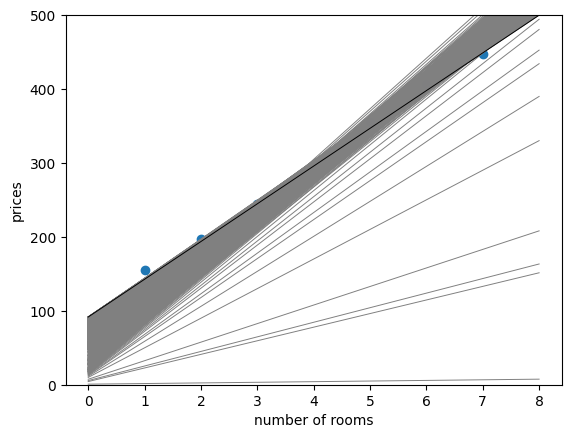

In [19]:
# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    for epoch in range(epochs):
        # Uncomment any of the following lines to plot different epochs
        #if epoch == 1:
        #if epoch <= 10:
        #if epoch <= 50:
        #if epoch > 50:
        if True:
            draw_line(price_per_room, base_price, starting=0, ending=8)
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment any of the 2 following lines to use a different trick
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    X = np.array(features)
    y = np.array(labels)
    plt.scatter(X, y)
    plt.xlabel('number of rooms')
    plt.ylabel('prices')
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 1000)

## Root mean squared error function

In [20]:
# The root mean square error function
def rmse(labels, predictions):
    n = len(labels)
    differences = np.subtract(labels, predictions)
    return np.sqrt(1.0/n * (np.dot(differences, differences)))

## Plotting the error function

Price per room: 51.16780277820274
Base price: 99.42265402912152


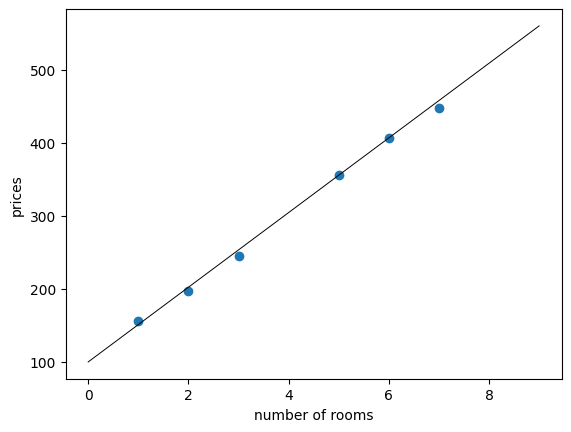

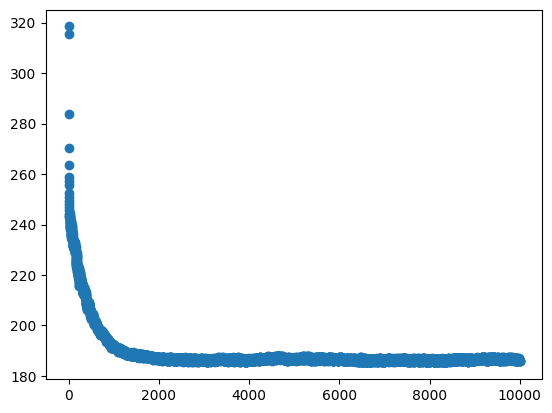

(np.float64(51.16780277820274), np.float64(99.42265402912152))

In [23]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features[0]*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    X = np.array(features)
    y = np.array(labels)
    plt.scatter(X, y)
    plt.xlabel('number of rooms')
    plt.ylabel('prices')
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

## Linear regression in Scikit-Learn

In [24]:
# Import LinearRegression from scikit-learn
from sklearn.linear_model import LinearRegression

# Reshape the features to be a 2D array, which is required by scikit-learn
features_reshaped = features.reshape(-1, 1)

In [25]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(features_reshaped, labels)

# Print the coefficients and intercept
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

Coefficient: [50.39285714]
Intercept: 99.59523809523819


In [26]:
# Make a prediction for a new point
new_point = np.array([[4]])  # Predict for a feature value of 4
predicted_label = model.predict(new_point)
print("Predicted label for feature 4:", predicted_label)

Predicted label for feature 4: [301.16666667]


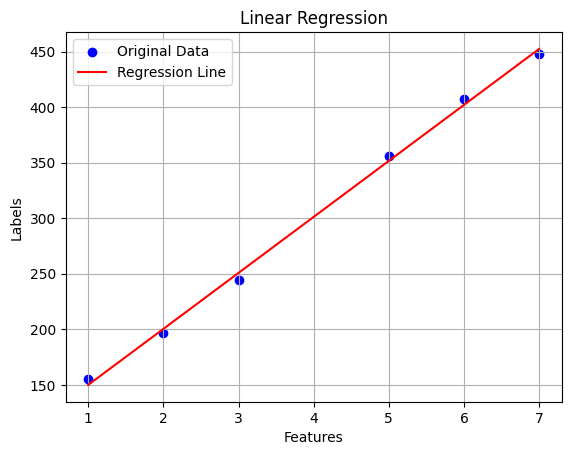

In [28]:
# Plot the results
# Generate the predicted values using the model
predicted_labels = model.predict(features_reshaped)
# Plot the original points
plt.scatter(features, labels, color='blue', label='Original Data')
# Plot the regression line
plt.plot(features, predicted_labels, color='red', label='Regression Line')
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()